In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/27.jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/28 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test/ModerateDemented/31 (2).jpg
/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,Dense, Bidirectional, LSTM,TimeDistributed
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

2024-05-08 20:14:20.371466: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 20:14:20.371579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 20:14:20.661929: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define training and validation data directories
train_dir = "/kaggle/input/alhzemir-data/Alzheimer_s Dataset/train"
test_dir = "/kaggle/input/alhzemir-data/Alzheimer_s Dataset/test"

# Set image dimensions (replace with your image size)
img_width, img_height = 150, 150

# Use data generators to load images and labels (modify for your data structure)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode="categorical"
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
class_len = 4
from tensorflow.keras.layers import Reshape
import time

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define data generators (already provided)
# ... your data generator code here ...

# Define image dimensions
img_width, img_height = 150, 150

# Define CNN model
model = Sequential([
  # Input layer for the image (replace channels with your data's format)
  keras.layers.Input(shape=(img_height, img_width, 3)),

  # Feature extraction with CNN blocks
  Conv2D(16, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(32, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),
  Conv2D(64, (3, 3), activation='relu', padding='same'),
  MaxPooling2D(pool_size=(2, 2)),

  # Flatten the features before dense layers
  Flatten(),
  
  # Dense layers with activation for classification (adapt class_len to your data)
  Dense(128, activation='relu'),
  Dense(class_len, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
time_list = []
accuracy_list = []
val_accuracy_list = []
loss_list = []
val_loss_list = []
# Train the model
for epoch in range(20):
    start_time = time.time()
    history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=1,
                        validation_data=test_generator, validation_steps=len(test_generator))
    end_time = time.time()
    epoch_time = end_time - start_time    # Append epoch time to the list
    time_list.append(epoch_time)
    accuracy_list.append(history.history['accuracy'][0])
    val_accuracy_list.append(history.history['val_accuracy'][0])
    loss_list.append(history.history['loss'][0])
    val_loss_list.append(history.history['val_loss'][0])


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/161 ━━━━━━━━━━━━━━━━━━━━ 32:57 12s/step - accuracy: 0.2188 - loss: 1.3921

I0000 00:00:1715199293.077432     122 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1715199293.099676     122 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


160/161 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step - accuracy: 0.4590 - loss: 1.1366

W0000 00:00:1715199363.909071     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


161/161 ━━━━━━━━━━━━━━━━━━━━ 96s 520ms/step - accuracy: 0.4595 - loss: 1.1352 - val_accuracy: 0.5051 - val_loss: 1.0582
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 223ms/step - accuracy: 0.5598 - loss: 0.9155 - val_accuracy: 0.5496 - val_loss: 1.0354
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 225ms/step - accuracy: 0.5868 - loss: 0.8764 - val_accuracy: 0.5520 - val_loss: 0.9206
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 226ms/step - accuracy: 0.5974 - loss: 0.8473 - val_accuracy: 0.5434 - val_loss: 0.9260
161/161 ━━━━━━━━━━━━━━━━━━━━ 38s 223ms/step - accuracy: 0.6198 - loss: 0.7894 - val_accuracy: 0.5082 - val_loss: 0.9634
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/step - accuracy: 0.6551 - loss: 0.7345 - val_accuracy: 0.5582 - val_loss: 0.9166
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 221ms/step - accuracy: 0.6700 - loss: 0.6996 - val_accuracy: 0.4918 - val_loss: 1.0212
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 222ms/step - accuracy: 0.6945 - loss: 0.6503 - val_accuracy: 0.5856 - val_loss: 0.9048
161/161 ━━━━━━━━━━━━━━━━━━━━ 37s 223ms/s

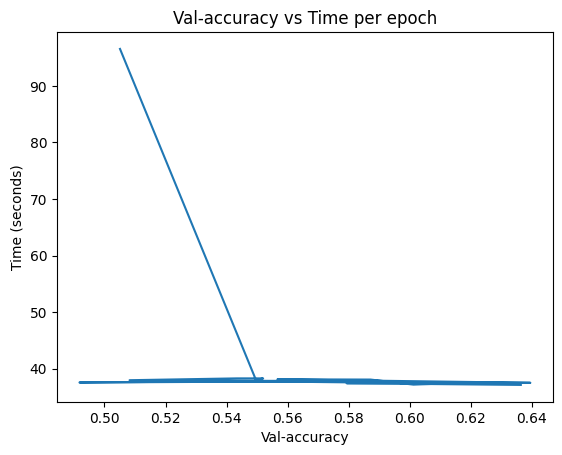

In [7]:
plt.plot(val_accuracy_list, time_list, label='GPU')
plt.title('Val-accuracy vs Time per epoch')
plt.ylabel('Time (seconds)')
plt.xlabel('Val-accuracy')
plt.show()

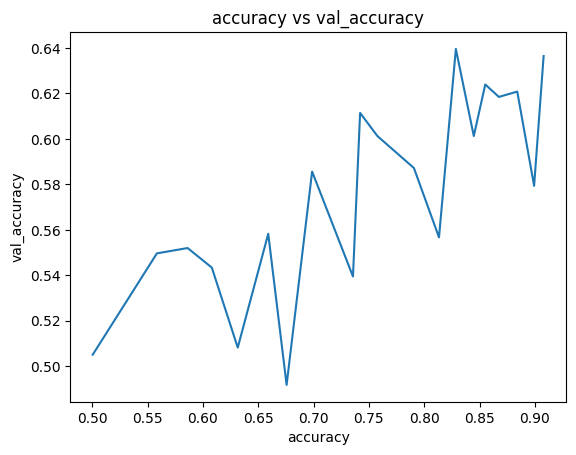

In [8]:
plt.plot(accuracy_list, val_accuracy_list, label='CPU')
plt.title('accuracy vs val_accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.show()

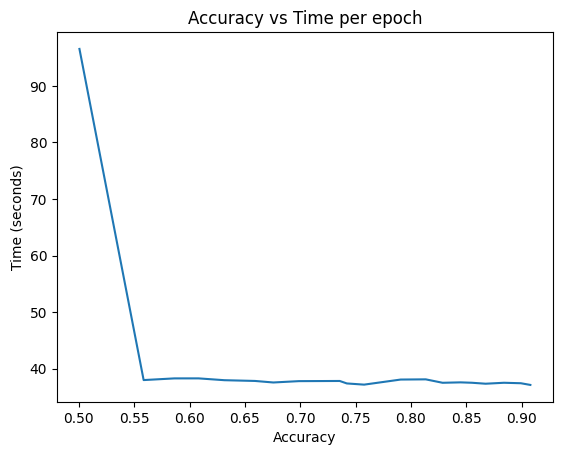

In [9]:
plt.plot(accuracy_list, time_list, label='CPU')
plt.title('Accuracy vs Time per epoch')
plt.ylabel('Time (seconds)')
plt.xlabel('Accuracy')
plt.show()

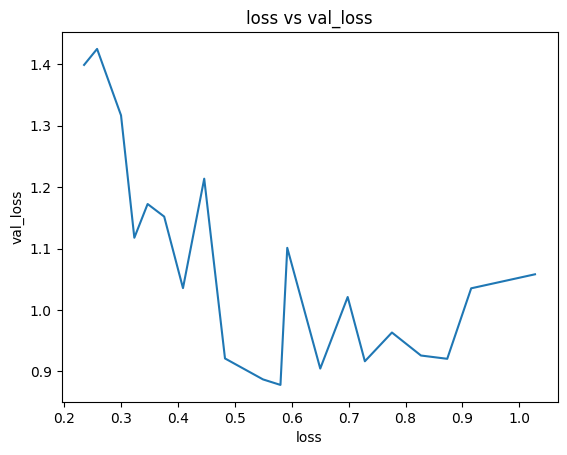

In [10]:
plt.plot(loss_list, val_loss_list, label='CPU')
plt.title('loss vs val_loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.show()

In [15]:
accuracy_list

[0.5004881620407104,
 0.558484673500061,
 0.5862136483192444,
 0.6080843806266785,
 0.6315172910690308,
 0.6590509414672852,
 0.6756492853164673,
 0.6986916661262512,
 0.7355985045433044,
 0.7420425415039062,
 0.7576645016670227,
 0.790665864944458,
 0.8133177161216736,
 0.8285490870475769,
 0.8447569012641907,
 0.8551064133644104,
 0.8674086928367615,
 0.8840070366859436,
 0.8992384076118469,
 0.9078304767608643]

In [16]:
loss_list

[1.0277179479599,
 0.9154969453811646,
 0.8733571171760559,
 0.8271321058273315,
 0.7761019468307495,
 0.7284939289093018,
 0.6982793211936951,
 0.6500238180160522,
 0.5920032858848572,
 0.5800427794456482,
 0.549349844455719,
 0.48248404264450073,
 0.44595280289649963,
 0.40860000252723694,
 0.37552395462989807,
 0.34639206528663635,
 0.32303816080093384,
 0.29962897300720215,
 0.25751248002052307,
 0.23466068506240845]

In [17]:
val_accuracy_list

[0.5050820708274841,
 0.5496481657028198,
 0.551993727684021,
 0.5433932542800903,
 0.5082095265388489,
 0.5582486391067505,
 0.4917904734611511,
 0.5856137871742249,
 0.5394839644432068,
 0.6114151477813721,
 0.6012510061264038,
 0.5871774554252625,
 0.5566849112510681,
 0.6395621299743652,
 0.6012510061264038,
 0.623924970626831,
 0.6184518933296204,
 0.6207975149154663,
 0.5793588757514954,
 0.6364347338676453]

In [18]:
val_loss_list

[1.0581549406051636,
 1.035361886024475,
 0.9206438660621643,
 0.9259833693504333,
 0.9634097218513489,
 0.9166155457496643,
 1.0212033987045288,
 0.9047654271125793,
 1.1011942625045776,
 0.8781343102455139,
 0.8871002197265625,
 0.9212155938148499,
 1.2137329578399658,
 1.0356749296188354,
 1.1520767211914062,
 1.1725521087646484,
 1.1176385879516602,
 1.31681227684021,
 1.424924612045288,
 1.3989077806472778]

In [19]:
time_list

[96.51917338371277,
 37.99263834953308,
 38.2892279624939,
 38.29190635681152,
 37.96946573257446,
 37.838403940200806,
 37.566460609436035,
 37.80435371398926,
 37.833513259887695,
 37.39690160751343,
 37.187050342559814,
 38.08473992347717,
 38.12030243873596,
 37.51403188705444,
 37.587461709976196,
 37.51732039451599,
 37.34802746772766,
 37.51687479019165,
 37.433661699295044,
 37.1356143951416]